### Importing required modules

In [197]:
import os 
import time
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

from IPython.display import Image  
from collections import defaultdict
from sklearn import svm, tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2, SelectFromModel
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

%matplotlib inline

### Reading data and exploring it

In [198]:
train=pd.read_excel('train.xlsx')
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [28]:
train.drop('Loan_ID',inplace=True,axis=1)
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [29]:
train['Loan_Status']=train['Loan_Status'].map({'Y':1,'N':0})

In [30]:
y_train=train['Loan_Status']
y_train

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [31]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [32]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Data Analysis

<Axes: xlabel='Loan_Status', ylabel='count'>

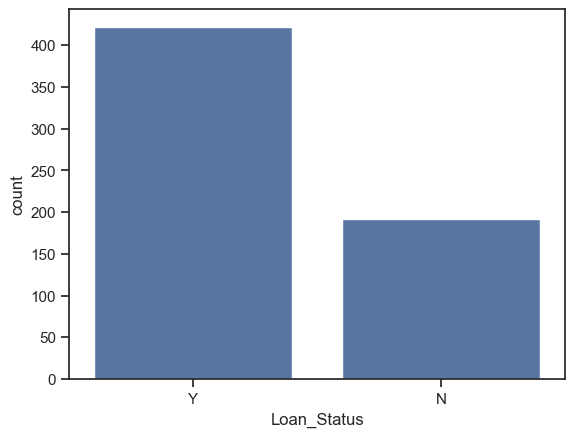

In [199]:
sns.countplot(x='Loan_Status',data=train)

In [ ]:
train['Credit_History'].value_counts()

Credit_History
1.0    475
0.0    139
Name: count, dtype: int64

In [ ]:
475/(475+139)

0.7736156351791531

In [ ]:
139/(475+139)

0.2263843648208469

<Axes: xlabel='Credit_History', ylabel='count'>

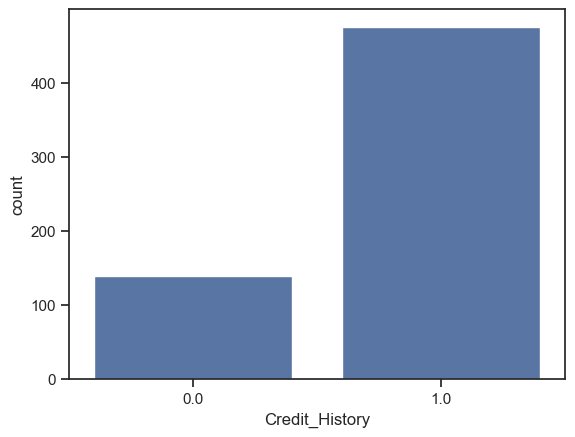

In [ ]:
sns.countplot(x='Credit_History',data=train)

In [46]:
cat_columns = train.select_dtypes(include=['object'])
cat_columns.columns
cat_columns=list(cat_columns)
cat_columns.append('Credit_History')
cat_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Credit_History']

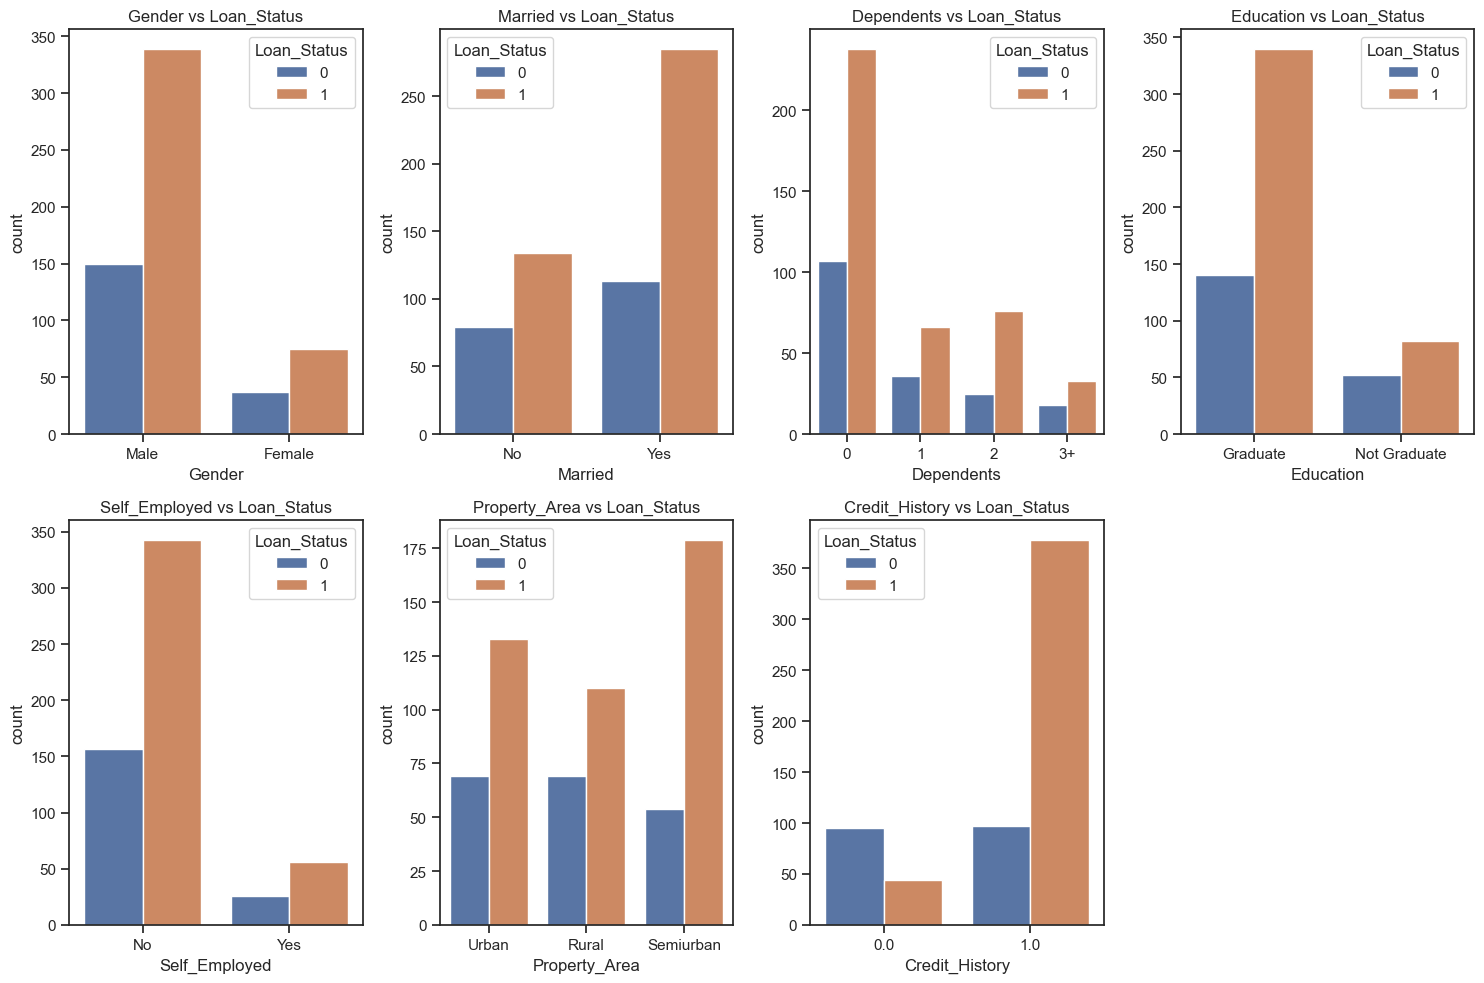

In [48]:
features = ['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

# Target variable (e.g., survived, which is binary/categorical)
target = 'Loan_Status'

# Set up the figure and axes (2 rows, divide number of plots between rows)
fig, axes = plt.subplots(nrows=2, ncols=len(features)//2 + len(features)%2, figsize=(15, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through features and plot
for i, feature in enumerate(features):
    sns.countplot(x=feature, hue=target, data=train, ax=axes[i])
    axes[i].set_title(f'{feature} vs {target}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


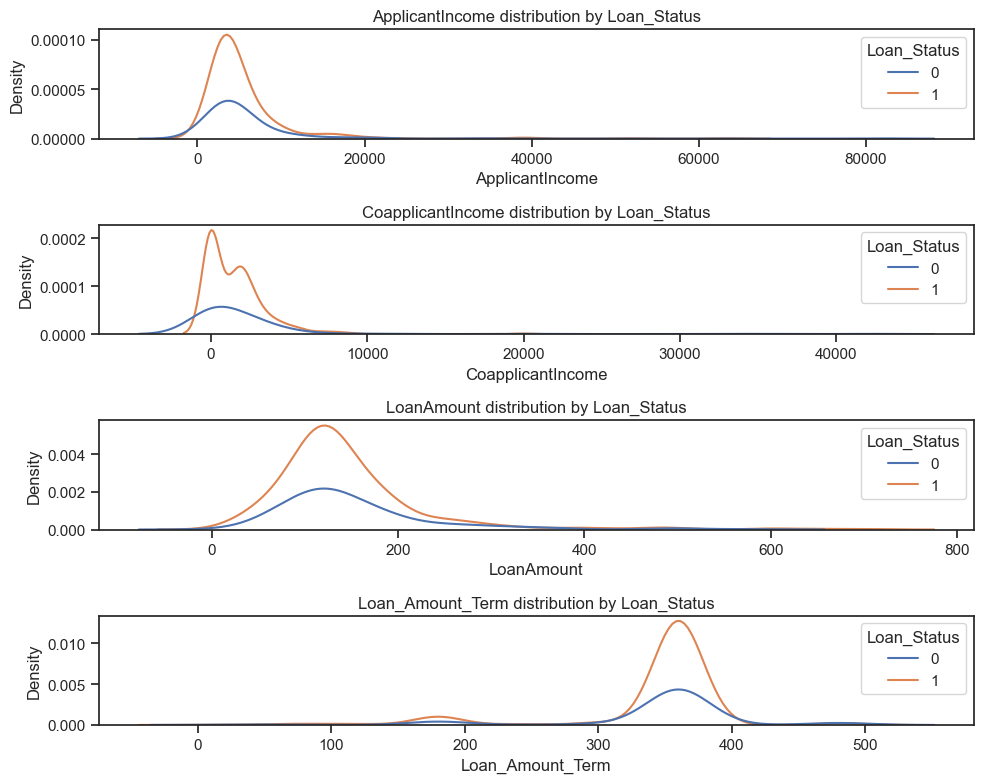

In [50]:
continuous_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'] 
target = 'Loan_Status'  # Categorical target

# Set up the figure for multiple KDE plots
fig, axes = plt.subplots(nrows=len(continuous_features), ncols=1, figsize=(10, 8))

# Loop through continuous features and plot KDE plots
for i, feature in enumerate(continuous_features):
    sns.kdeplot(data=train, x=feature, hue=target, ax=axes[i])
    axes[i].set_title(f'{feature} distribution by {target}')

plt.tight_layout()
plt.show()


### Train Data Imputation

#### Imputing Numerical columns

In [53]:
def missing_val_imput_num(train,dataset,col):
    dataset.loc[dataset[col].isnull(),col] = train[col].median()
    print("Missing value imputaion for {} done".format(col))
    return

In [54]:
num_col=[col for col in train.columns if train[col].dtype!='object']
num_col.remove('Credit_History')
num_col.remove('Loan_Status')
num_col

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [56]:
for col_name in num_col:
    missing_val_imput_num(train,train,col_name)

Missing value imputaion for ApplicantIncome done
Missing value imputaion for CoapplicantIncome done
Missing value imputaion for LoanAmount done
Missing value imputaion for Loan_Amount_Term done


In [57]:
train.loc[train['Credit_History'].isnull(),'Credit_History'] = 0

In [58]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

#### Imputing categorical columns

In [59]:
cat_columns = train.select_dtypes(include=['object'])
cat_null_columns=cat_columns.columns[cat_columns.isnull().any()]
cat_null_columns

Index(['Gender', 'Married', 'Dependents', 'Self_Employed'], dtype='object')

In [61]:
def missing_val_imput_cat(train,dataset,col):
    dataset.loc[dataset[col].isnull(),col] = train[col].mode()[0]
    print("Missing value imputaion for {} done".format(col))
    return

In [62]:
for col_name in cat_null_columns:
    missing_val_imput_cat(train,train,col_name)

Missing value imputaion for Gender done
Missing value imputaion for Married done
Missing value imputaion for Dependents done
Missing value imputaion for Self_Employed done


In [63]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


<Axes: xlabel='Dependents', ylabel='count'>

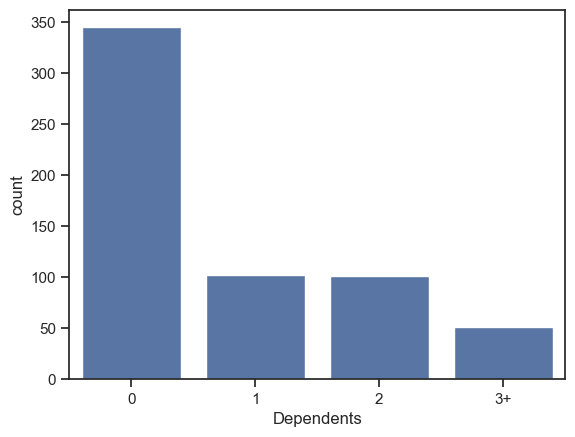

In [65]:
sns.countplot(x='Dependents',data=X_train)

In [66]:
train['Dependents']=train['Dependents'].map({0:0,1:1,2:2,'3+':3})

In [67]:
train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0


In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 57.7+ KB


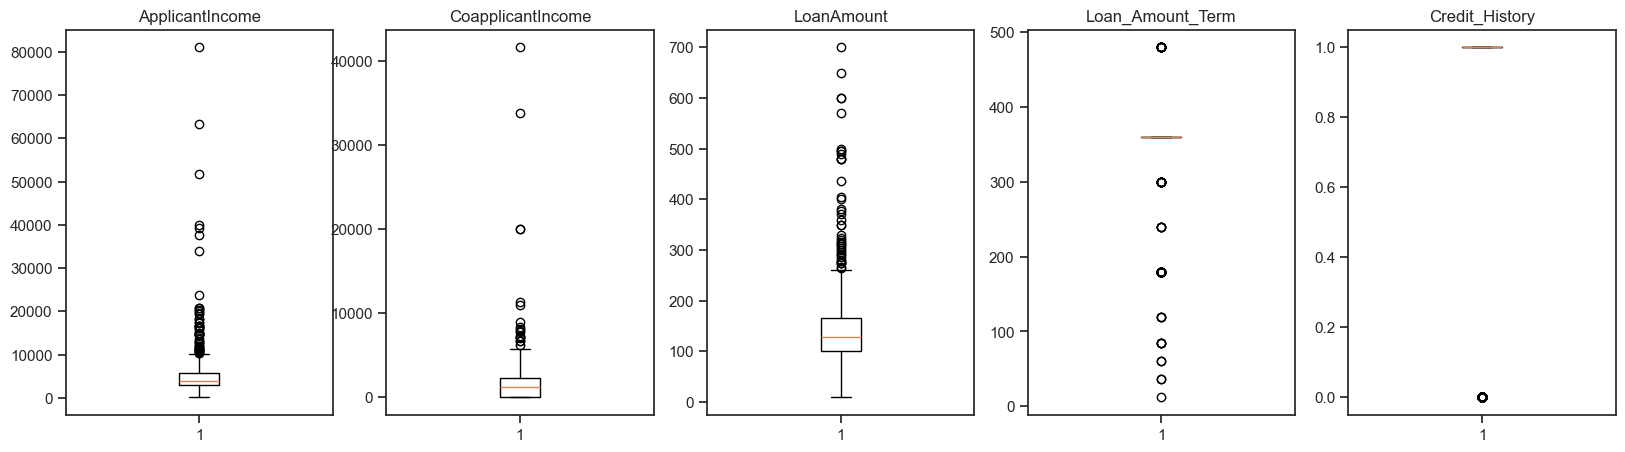

In [69]:
# Boxplots for continuous attributes
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,5))
axes[0].boxplot(train['ApplicantIncome'])
axes[0].set_title('ApplicantIncome')
axes[1].boxplot(train['CoapplicantIncome'])
axes[1].set_title('CoapplicantIncome')
axes[2].boxplot(train['LoanAmount'])
axes[2].set_title('LoanAmount')
axes[3].boxplot(train['Loan_Amount_Term'])
axes[3].set_title('Loan_Amount_Term')
axes[4].boxplot(train['Credit_History'])
axes[4].set_title('Credit_History')

fig.savefig("boxplots.png")

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

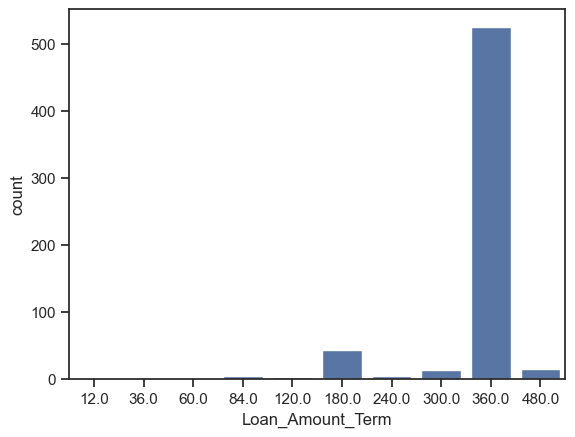

In [70]:
sns.countplot(x='Loan_Amount_Term',data=train)

### Test Data Imputation

In [75]:
test=pd.read_excel('test.xlsx')
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [76]:
test.drop("Loan_ID",inplace=True,axis=1)
X_test=test
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [77]:
X_test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

#### Imputing Numerical columns

In [82]:
num_columns = X_test.select_dtypes(exclude=['object'])
num_null_columns=num_columns.columns[num_columns.isnull().any()]
num_null_columns=list(num_null_columns)
num_null_columns

['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [83]:
num_null_columns.remove('Credit_History')
num_null_columns

['LoanAmount', 'Loan_Amount_Term']

In [84]:
for col_name in num_null_columns:
    missing_val_imput_num(train,X_test,col_name)

Missing value imputaion for LoanAmount done
Missing value imputaion for Loan_Amount_Term done


In [85]:
X_test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

In [86]:
X_test.loc[X_test['Credit_History'].isnull(),'Credit_History'] = 0

In [87]:
X_test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

#### Imputing Categorical Columns

In [88]:
cat_columns = X_test.select_dtypes(include=['object'])
cat_null_columns=cat_columns.columns[cat_columns.isnull().any()]
cat_null_columns=list(cat_null_columns)
cat_null_columns

['Gender', 'Dependents', 'Self_Employed']

In [89]:
for col_name in cat_null_columns:
    missing_val_imput_cat(train,X_test,col_name)

Missing value imputaion for Gender done
Missing value imputaion for Dependents done
Missing value imputaion for Self_Employed done


In [90]:
X_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [91]:
X_test['Dependents']=X_test['Dependents'].map({0:0,1:1,2:2,'3+':3})
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    int64  
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 31.7+ KB


### Outliers_Handling_After Imputation

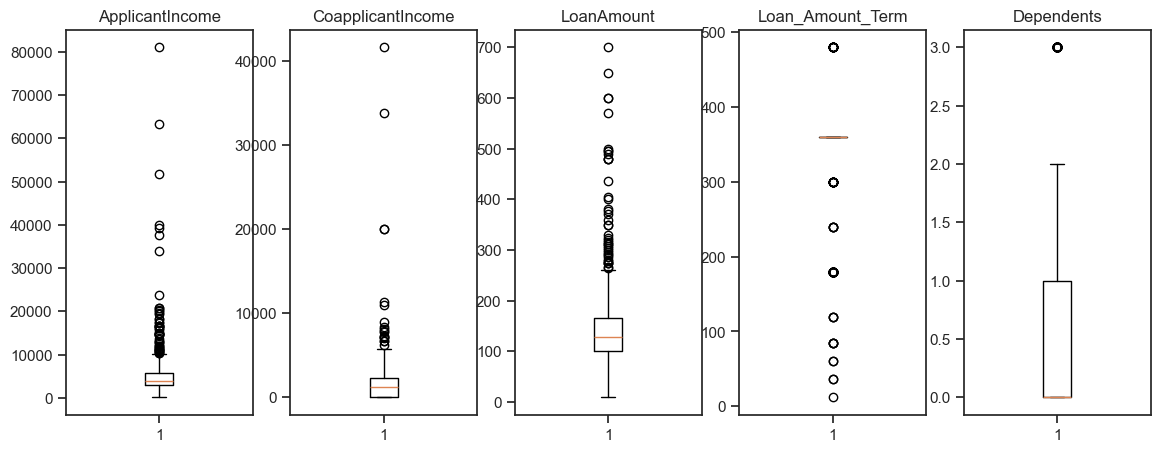

In [95]:
# Boxplots for continuous attributes
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(14,5))
axes[0].boxplot(train['ApplicantIncome'])
axes[0].set_title('ApplicantIncome')
axes[1].boxplot(train['CoapplicantIncome'])
axes[1].set_title('CoapplicantIncome')
axes[2].boxplot(train['LoanAmount'])
axes[2].set_title('LoanAmount')
axes[3].boxplot(train['Loan_Amount_Term'])
axes[3].set_title('Loan_Amount_Term')
axes[4].boxplot(train['Dependents'])
axes[4].set_title('Dependents')



fig.savefig("boxplots.png")

In [97]:
num_cols=[col_name for col_name in train.columns if train[col_name].dtype!='object']
num_cols

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Loan_Status']

In [101]:
num_cols.remove('Credit_History')
num_cols.remove('Loan_Status')
num_cols.remove('Dependents')
num_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [102]:
X_train_num=train.loc[:,num_cols]
X_train_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,128.0,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0
...,...,...,...,...
609,2900.0,0.0,71.0,360.0
610,4106.0,0.0,40.0,180.0
611,8072.0,240.0,253.0,360.0
612,7583.0,0.0,187.0,360.0


In [103]:
# Function to clip data while ignoring NaNs
def clip_data_with_nans(df, lower_percentile=0.05, upper_percentile=0.95):
    # Calculate percentile-based bounds, ignoring NaNs
    lower_bound = df.quantile(lower_percentile, interpolation='linear')
    upper_bound = df.quantile(upper_percentile, interpolation='linear')
    
    # Apply clipping only to non-null values, leaving NaNs as-is
    df_clipped = df.apply(lambda col: np.where(col.isna(), col, col.clip(lower_bound[col.name], upper_bound[col.name])))
    
    return pd.DataFrame(df_clipped, columns=df.columns)

# Clipping all features based on 5th and 95th percentiles while handling NaNs
X_train_clipped = clip_data_with_nans(X_train_num, 0.05, 0.95)

print("\nData after clipping (NaNs preserved):")
print(X_train_clipped)


Data after clipping (NaNs preserved):
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
0             5849.0                0.0       128.0             360.0
1             4583.0             1508.0       128.0             360.0
2             3000.0                0.0        66.0             360.0
3             2583.0             2358.0       120.0             360.0
4             6000.0                0.0       141.0             360.0
..               ...                ...         ...               ...
609           2900.0                0.0        71.0             360.0
610           4106.0                0.0        57.3             180.0
611           8072.0              240.0       253.0             360.0
612           7583.0                0.0       187.0             360.0
613           4583.0                0.0       133.0             360.0

[614 rows x 4 columns]


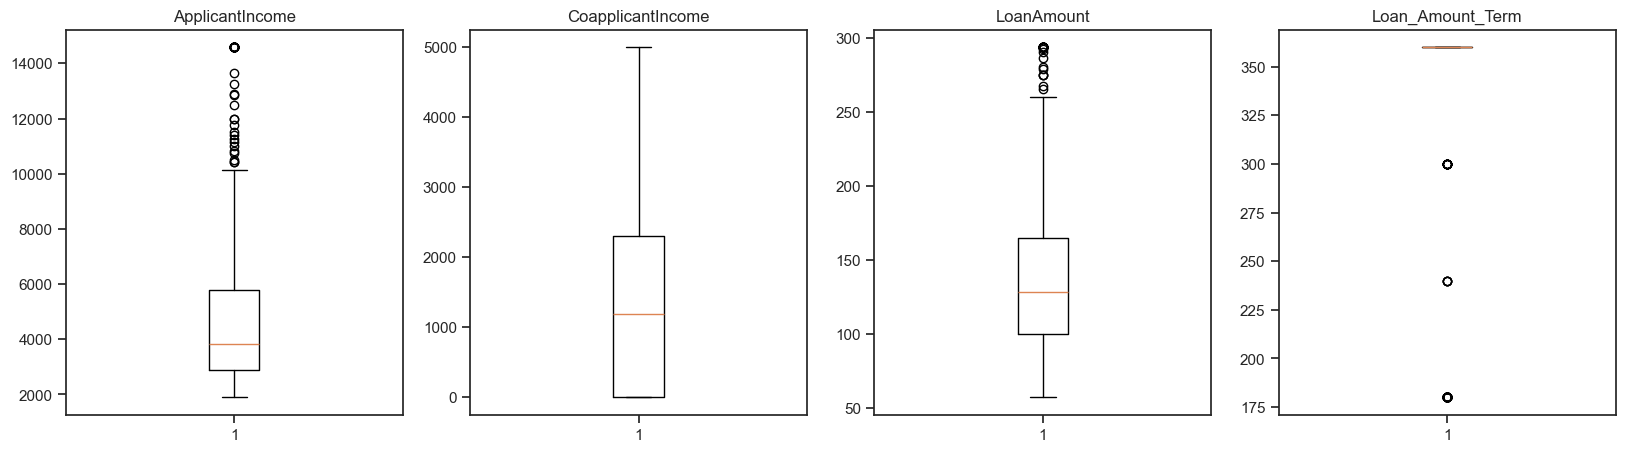

In [105]:
# Boxplots for continuous attributes
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
axes[0].boxplot(X_train_clipped['ApplicantIncome'])
axes[0].set_title('ApplicantIncome')
axes[1].boxplot(X_train_clipped['CoapplicantIncome'])
axes[1].set_title('CoapplicantIncome')
axes[2].boxplot(X_train_clipped['LoanAmount'])
axes[2].set_title('LoanAmount')
axes[3].boxplot(X_train_clipped['Loan_Amount_Term'])
axes[3].set_title('Loan_Amount_Term')


fig.savefig("boxplots.png")

In [106]:
cat_cols=[col_name for col_name in train.columns if train[col_name].dtype=='object']
cat_cols

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [108]:
X_train_cat=train.loc[:,cat_cols]
X_train_cat

,Gender,Married,Education,Self_Employed,Property_Area
0,Male,No,Graduate,No,Urban
1,Male,Yes,Graduate,No,Rural
2,Male,Yes,Graduate,Yes,Urban
3,Male,Yes,Not Graduate,No,Urban
4,Male,No,Graduate,No,Urban
...,...,...,...,...,...
609,Female,No,Graduate,No,Rural
610,Male,Yes,Graduate,No,Rural
611,Male,Yes,Graduate,No,Urban
612,Male,Yes,Graduate,No,Urban


In [109]:
X_remaining=train.loc[:,['Credit_History','Dependents']]
X_remaining.columns=['Credit_History','Dependents']
X_remaining

,Credit_History,Dependents
0,1.0,0
1,1.0,1
2,1.0,0
3,1.0,0
4,1.0,0
...,...,...
609,1.0,0
610,1.0,3
611,1.0,1
612,1.0,2


In [110]:
X_train_outlies=pd.concat([X_train_cat,X_train_clipped,X_remaining],axis=1)
X_train_outlies

,Gender,Married,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents
0,Male,No,Graduate,No,Urban,5849.0,0.0,128.0,360.0,1.0,0
1,Male,Yes,Graduate,No,Rural,4583.0,1508.0,128.0,360.0,1.0,1
2,Male,Yes,Graduate,Yes,Urban,3000.0,0.0,66.0,360.0,1.0,0
3,Male,Yes,Not Graduate,No,Urban,2583.0,2358.0,120.0,360.0,1.0,0
4,Male,No,Graduate,No,Urban,6000.0,0.0,141.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,Rural,2900.0,0.0,71.0,360.0,1.0,0
610,Male,Yes,Graduate,No,Rural,4106.0,0.0,57.3,180.0,1.0,3
611,Male,Yes,Graduate,No,Urban,8072.0,240.0,253.0,360.0,1.0,1
612,Male,Yes,Graduate,No,Urban,7583.0,0.0,187.0,360.0,1.0,2


In [111]:
new_order=['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']
X_train=X_train_outlies.reindex(columns=new_order)
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3,Graduate,No,4106.0,0.0,57.3,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban


### Encoding the categorical Variables

##### Train Data

In [112]:
X_train.shape,X_test.shape,y_train.shape

((614, 11), (367, 11), (614,))

In [113]:
X_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural


In [117]:
X_train['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

<Axes: xlabel='Property_Area', ylabel='count'>

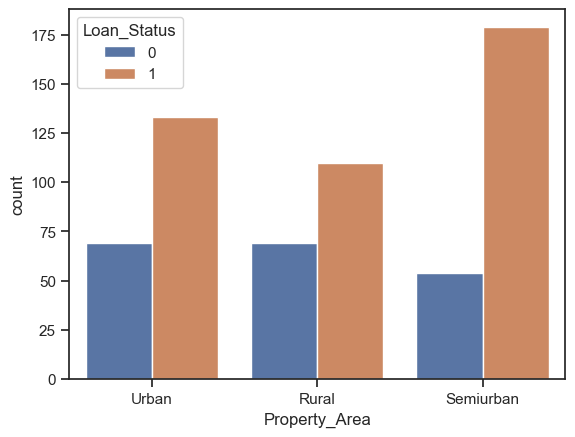

In [119]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=train)

In [120]:
def encode_cat(df):
    df['Gender']=df['Gender'].map({'Male':1,'Female':0})
    df['Married']=df['Married'].map({'Yes':1,'No':0})
    df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
    df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
    df['Property_Area']=df['Property_Area'].map({'Semiurban':2,'Urban':1,'Rural':0})

In [121]:
encode_cat(X_train)

In [122]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849.0,0.0,128.0,360.0,1.0,1
1,1,1,1,1,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000.0,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583.0,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000.0,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900.0,0.0,71.0,360.0,1.0,0
610,1,1,3,1,0,4106.0,0.0,57.3,180.0,1.0,0
611,1,1,1,1,0,8072.0,240.0,253.0,360.0,1.0,1
612,1,1,2,1,0,7583.0,0.0,187.0,360.0,1.0,1


In [123]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 52.9 KB


#### Test data

In [124]:
X_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849.0,0.0,128.0,360.0,1.0,1
1,1,1,1,1,0,4583.0,1508.0,128.0,360.0,1.0,0


In [125]:
X_test.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [126]:
encode_cat(X_test)

In [127]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,1
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,1
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,1
3,1,1,2,1,0,2340,2546,100.0,360.0,0.0,1
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,0,1,4009,1777,113.0,360.0,1.0,1
363,1,1,0,1,0,4158,709,115.0,360.0,1.0,1
364,1,0,0,1,0,3250,1993,126.0,360.0,0.0,2
365,1,1,0,1,0,5000,2393,158.0,360.0,1.0,0


### Handling Numerical Variables__Standardization

In [128]:
num_col_names=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
# Standardization
scaler = StandardScaler()

X_train_standardized = scaler.fit_transform(X_train[num_col_names])
X_test_standardized = scaler.transform(X_test[num_col_names])

X_train_standardized = pd.DataFrame(X_train_standardized)
X_test_standardized = pd.DataFrame(X_test_standardized)


print("Standardization done")

Standardization done


In [129]:
X_train_standardized

,0,1,2,3
0,0.294804,-0.897811,-0.203372,0.350035
1,-0.104493,0.076862,-0.203372,0.350035
2,-0.603773,-0.897811,-1.253598,0.350035
3,-0.735295,0.626247,-0.338885,0.350035
4,0.342430,-0.897811,0.016837,0.350035
...,...,...,...,...
609,-0.635313,-0.897811,-1.168902,0.350035
610,-0.254939,-0.897811,-1.400969,-3.061421
611,0.995940,-0.742691,1.914020,0.350035
612,0.841709,-0.897811,0.796037,0.350035


In [130]:
X_train_standardized.columns = num_col_names
X_test_standardized.columns = num_col_names

In [131]:
X_train_standardized

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.294804,-0.897811,-0.203372,0.350035
1,-0.104493,0.076862,-0.203372,0.350035
2,-0.603773,-0.897811,-1.253598,0.350035
3,-0.735295,0.626247,-0.338885,0.350035
4,0.342430,-0.897811,0.016837,0.350035
...,...,...,...,...
609,-0.635313,-0.897811,-1.168902,0.350035
610,-0.254939,-0.897811,-1.400969,-3.061421
611,0.995940,-0.742691,1.914020,0.350035
612,0.841709,-0.897811,0.796037,0.350035


### Modeling_Tweeks

In [132]:
X_train_cat = X_train.drop(num_col_names,axis = 1)
X_test_cat = X_test.drop(num_col_names,axis = 1)

X_train_cat.reset_index(inplace=True,drop=True)
X_test_cat.reset_index(inplace=True,drop=True)

In [133]:
y_train.reset_index(inplace=True,drop=True)

In [134]:
### Concating the  Transformed Variables

In [135]:
# Concatenating the transformed varaible and createting a datset with transformed varaible

X_train_transformed = pd.concat([X_train_standardized,X_train_cat], axis = 1)

X_test_tarnsformed = pd.concat([X_test_standardized,X_test_cat], axis = 1)

print(X_train_transformed.shape)

print(X_test_tarnsformed.shape)

(614, 11)
(367, 11)


In [136]:
X_train_transformed

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,0.294804,-0.897811,-0.203372,0.350035,1,0,0,1,0,1.0,1
1,-0.104493,0.076862,-0.203372,0.350035,1,1,1,1,0,1.0,0
2,-0.603773,-0.897811,-1.253598,0.350035,1,1,0,1,1,1.0,1
3,-0.735295,0.626247,-0.338885,0.350035,1,1,0,0,0,1.0,1
4,0.342430,-0.897811,0.016837,0.350035,1,0,0,1,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,-0.635313,-0.897811,-1.168902,0.350035,0,0,0,1,0,1.0,0
610,-0.254939,-0.897811,-1.400969,-3.061421,1,1,3,1,0,1.0,0
611,0.995940,-0.742691,1.914020,0.350035,1,1,1,1,0,1.0,1
612,0.841709,-0.897811,0.796037,0.350035,1,1,2,1,0,1.0,1


In [137]:
X_test_tarnsformed

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,0.254117,-0.897811,-0.508276,0.350035,1,1,0,1,0,1.0,1
1,-0.579802,0.071691,-0.237250,0.350035,1,1,1,1,0,1.0,1
2,0.027029,0.265592,1.151759,0.350035,1,1,2,1,0,1.0,1
3,-0.811937,0.747758,-0.677668,0.350035,1,1,2,1,0,0.0,1
4,-0.516722,-0.897811,-1.050329,0.350035,1,0,0,0,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
362,-0.285533,0.250726,-0.457459,0.350035,1,1,3,0,1,1.0,1
363,-0.238539,-0.439560,-0.423580,0.350035,1,1,0,1,0,1.0,1
364,-0.524922,0.390334,-0.237250,0.350035,1,0,0,1,0,0.0,2
365,0.027029,0.648869,0.304802,0.350035,1,1,0,1,0,1.0,0


In [138]:
y_train=pd.DataFrame(y_train,columns=['Loan_Status'])
y_train

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


### SMOTE for balancing 

In [139]:
sm = SMOTE(sampling_strategy=0.7)
X_train_transformed_smot, y_train_smot = sm.fit_resample(X_train_transformed,y_train)

In [140]:
X_train_transformed_smot = pd.DataFrame(X_train_transformed_smot)

In [141]:
X_train_transformed_smot.columns = X_train_transformed.columns

In [143]:
y_train_smot

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
712,0
713,0
714,0
715,0


In [146]:
y_train_smot.value_counts()

Loan_Status
1              422
0              295
Name: count, dtype: int64

### Functions to get evaluation metrics

In [176]:
# Function for evaluation reports
def train_eval(clf, X_train, y_train,y_pred):
    stratified_kfold = StratifiedKFold(n_splits=10)
    # Cross Validation to test and anticipate overfitting problem
    scores1 = cross_val_score(clf, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
    scores2 = cross_val_score(clf, X_train, y_train, cv=stratified_kfold, scoring='precision')
    scores3 = cross_val_score(clf, X_train, y_train, cv=stratified_kfold, scoring='roc_auc')
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std()))
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std()))
    print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std()))
    # Create and print confusion matrix
    #abclf_cm = confusion_matrix(y_test,y_pred)
    #print(abclf_cm)
    return

In [177]:
# Function fot test data evaluation
def test_eval(y_test,y_pred,y_pred_prob):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

     # Assuming y_test contains the true labels and y_pred_prob contains the predicted probabilities for the positive class
    auc_score = roc_auc_score(y_test, y_pred_prob)

    print(f"AUC Score: {auc_score:.4f}")

    conf_matrix = confusion_matrix(y_test, y_pred)

    # Visualize the confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.show()

   

### Different classification Algorithms

##### Decision Tree Classifier

In [178]:
# fit, train and cross validate Decision Tree with training and test data 
def dectreeclf(X_train, y_train,X_test):
    start = time.time()

    print("DecisionTreeClassifier")
    dec_tree = tree.DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=5).fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = dec_tree.predict(X_test)
    
    # Get Cross Validation and Confusion matrix
    train_eval(dec_tree, X_train, y_train,y_pred)
        
    end = time.time()
    training_time = end-start
    print("Time taken: ", training_time)
    return

# Visualize tree and save as .pdf
# Only works for dataframes, not for numpy arrays

In [179]:
# Decisiontree
# Train, test and evaluate the classifiers with different preprocessed data
print("clean resampled")
dectreeclf(X_train_transformed, y_train,X_test_tarnsformed)

clean resampled
DecisionTreeClassifier
Cross Validation Accuracy: 0.65 (+/- 0.04)
Cross Validation Precision: 0.74 (+/- 0.03)
Cross Validation roc_auc: 0.61 (+/- 0.07)
Time taken:  0.7269105911254883


##### Random Forest Classifier

In [189]:
# fit, train and cross validate Decision Tree with training and test data 
def randomforestclf(X_train, y_train,X_test):
    print("RandomForestClassifier")
    randomforest = RandomForestClassifier().fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = randomforest.predict(X_test)

    # Extract feature importances
    importances = randomforest.feature_importances_

    # Create a DataFrame to store feature names and their importance values
    feature_importances_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    })

    # Sort features by importance
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

    # Print the top features
    print("Top Features by Importance:")
    print(feature_importances_df)

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.title('Feature Importance in RandomForestClassifier')
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
    plt.show()
    
    # Get Cross Validation and Confusion matrix
    train_eval(randomforest, X_train, y_train,y_pred)
    return

clean resampled
RandomForestClassifier


c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Top Features by Importance:
              Feature  Importance
0     ApplicantIncome    0.229379
2          LoanAmount    0.217314
9      Credit_History    0.172292
1   CoapplicantIncome    0.127014
6          Dependents    0.057138
10      Property_Area    0.056621
3    Loan_Amount_Term    0.034210
7           Education    0.028664
5             Married    0.028508
4              Gender    0.027457
8       Self_Employed    0.021405


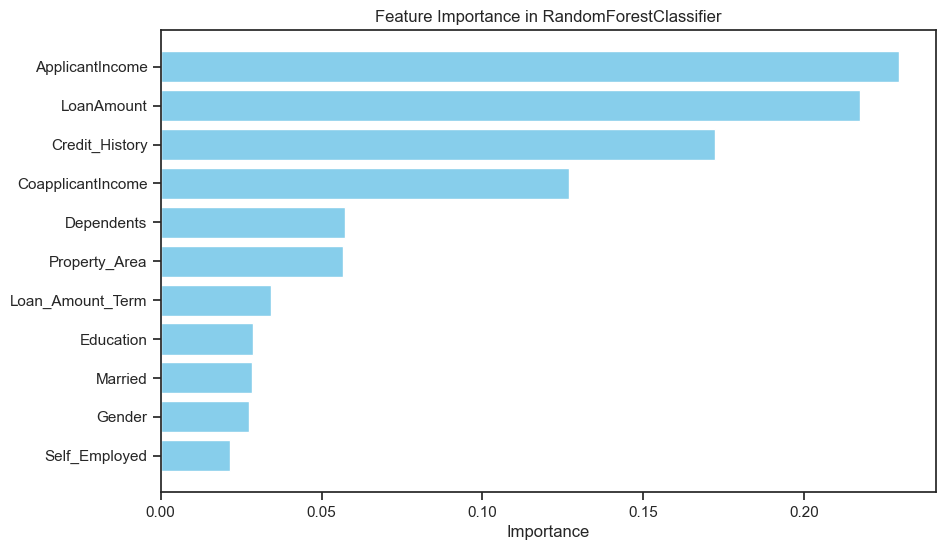

c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Cross Validation Accuracy: 0.73 (+/- 0.03)
Cross Validation Precision: 0.78 (+/- 0.03)
Cross Validation roc_auc: 0.72 (+/- 0.04)


In [ ]:
# Random Forest classifier
print("clean resampled")
randomforestclf(X_train_transformed, y_train,X_test_tarnsformed)

clean resampled
Fitting 10 folds for each of 200 candidates, totalling 2000 fits


c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.1s finished


Best params: {'n_estimators': 300, 'min_weight_fraction_leaf': 0.0025, 'min_samples_split': 0.01, 'min_samples_leaf': 6, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 40, 'max_features': 3, 'max_depth': 20}
Training score: 0.770
Top Features by Importance:
              Feature  Importance
9      Credit_History    0.429277
0     ApplicantIncome    0.135182
2          LoanAmount    0.122429
1   CoapplicantIncome    0.096560
10      Property_Area    0.084731
7           Education    0.044565
5             Married    0.026762
6          Dependents    0.026393
3    Loan_Amount_Term    0.013430
4              Gender    0.013197
8       Self_Employed    0.007473


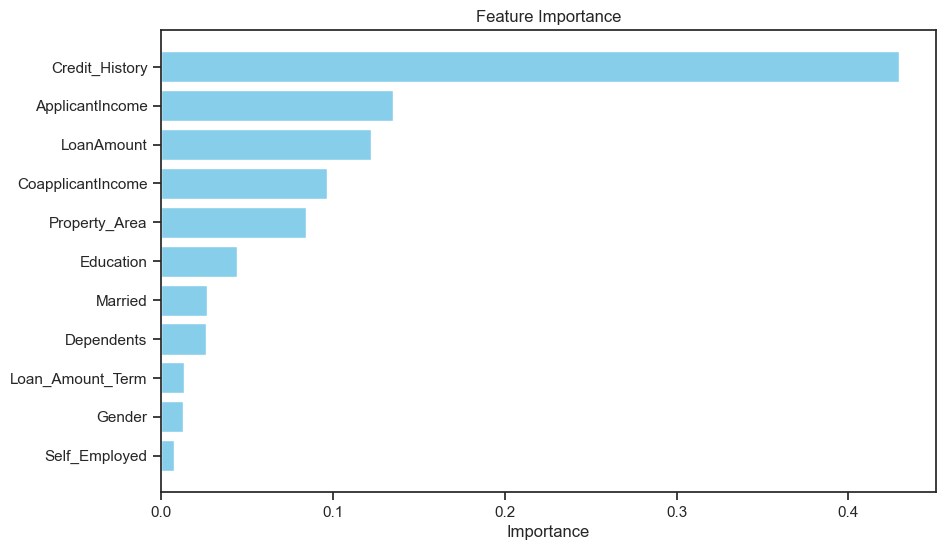

In [192]:
from sklearn.model_selection import RandomizedSearchCV

params={'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01,0.05],
        'min_samples_split':[2, 0.01,0.02, 0.03, 0.04, 0.06, 0.08,0.1],
        'min_samples_leaf':[1,2,4,6,8,10,20,30],
        'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15,0.2],
        'max_leaf_nodes':[10, 15, 20,25, 30, 35, 40, 45, 50, None],
        'max_features':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
        'max_depth':[None,2,4,6,8,10,20,25,30],
        'n_estimators':[50,100,150,200,250,300,350,400,450,500]}

def randomized_search_reg(X_train,y_train,X_test,params,runs=200,
                          clf=RandomForestClassifier(random_state=2,n_jobs=-1)):

    stratified_kfold = StratifiedKFold(n_splits=10)
    rand_clf =RandomizedSearchCV(clf, params,n_iter=runs,scoring='precision',
                                    cv=stratified_kfold, n_jobs=-1, random_state=2,verbose=1)
    
    rand_clf.fit(X_train, y_train)
    best_model =rand_clf.best_estimator_

    best_params = rand_clf.best_params_
    print("Best params:",best_params)

    best_score = rand_clf.best_score_
    print("Training score: {:.3f}".format(best_score))

    y_pred = best_model.predict(X_test)

    # Extract feature importances
    importances = best_model.feature_importances_

        # Create a DataFrame for better visualization
    feature_importances_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
        })

        # Sort by importance
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

    print("Top Features by Importance:")
    print(feature_importances_df)

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()  # To have the most important feature at the top
    plt.show()

    #from sklearn.metrics import precision_score as ps
    #precision_test = ps(y_test,y_pred)
    #print('Test set score(Precision):{:.3f}'.format(precision_test))

# Random Forest classifier
print("clean resampled")
randomized_search_reg(X_train_transformed_smot, y_train_smot,X_test_tarnsformed,params,runs=200,
                          clf=RandomForestClassifier(verbose=1,random_state=2,n_jobs=-1))

##### Logistic regression

In [193]:
# fit, train and cross validate Decision Tree with training and test data 
def logregclf(X_train, y_train,X_test):
    print("LogisticRegression")
    logreg = LogisticRegression().fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = logreg.predict(X_test)

    # Get Cross Validation and Confusion matrix
    train_eval(logreg, X_train, y_train,y_pred)
    return

In [194]:
# Logistic Regression
print("clean resampled")
logregclf(X_train_transformed, y_train,X_test_tarnsformed)

clean resampled
LogisticRegression


c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Cross Validation Accuracy: 0.76 (+/- 0.04)
Cross Validation Precision: 0.79 (+/- 0.03)
Cross Validation roc_auc: 0.75 (+/- 0.06)


c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

##### K Neighbors Classifier

In [195]:
def knnclf(X_train, y_train, X_test):  
    print("KNeighborsClassifier")
    knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = knn.predict(X_test)

    # Get Cross Validation and Confusion matrix
    train_eval(knn, X_train, y_train,y_pred)
    return

In [196]:
# KNN Classifier
print("clean resampled")
knnclf(X_train_transformed, y_train,X_test_tarnsformed)

clean resampled
KNeighborsClassifier


c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Cross Validation Accuracy: 0.71 (+/- 0.05)
Cross Validation Precision: 0.75 (+/- 0.03)
Cross Validation roc_auc: 0.64 (+/- 0.04)


c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\jrame\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam